# Sales Analysis


### Import necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import re

In [2]:
all_month_data = pd.DataFrame()
# df_april = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')

# df_april['new'] = df_april['Order Date'].str[0:1]
# df_april['new'] = '0' + df_april['new']
# df_april['new']

files = [file for file in os.listdir('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
for name in files:
    df = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/' + name)
    all_month_data = pd.concat([ all_month_data, df ])

# print(all_month_data.shape)
all_month_data.to_csv('all_month_data.csv', index=False)

# df.head()
# df.shape (18382, 6)

### Import new All month dataset.

In [3]:
all_data = pd.read_csv('all_month_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


### Cleaning the Data

In [9]:
all_data[all_data.isna().any(axis = 1)]
all_data.dropna(how='all', inplace=True)

In [10]:
print(all_data.isna().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64


#### Find 'Or' and removing it because in our dataset there some columns has 'Or'.

In [11]:
# all_data = all_data[all_data['Month'] == 'Or'] <---- by this we can find 'Or'
all_data = all_data[all_data['Month'] != 'Or']
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

## Making a new Month Column

In [13]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'].astype('int32')
# all_data[all_data.isna().any(axis = 1 )]
all_data['Month'].isna().sum()

0

## Adding a new Sales column which will be (QuantityOrdered * PriceEach)

### Q1) What is the best Month for Sale?

#### Converting QuantityOrdered and PriceEach data type for multiplication because they cannot multiply until they are off numeric type.

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric( all_data['Quantity Ordered'] )
all_data['Price Each'] = pd.to_numeric( all_data['Price Each'] )

In [26]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()
# print(2*11.99)
# all_data.info()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle WA,22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas TX,15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",08,700.00,Portland OR,14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles CA,20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",08,7.68,New York City NY,19


#### Get the best Sales Month

In [16]:
sales_sum = all_data.groupby('Month').sum()
sales_sum

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1.811768e+06,1.822257e+06
02,13449,2.188885e+06,2.202022e+06
03,17005,2.791208e+06,2.807100e+06
04,19,5.167430e+03,5.170420e+03
05,18638,3.124570e+06,3.142047e+06
06,15253,2.562026e+06,2.577802e+06
07,16072,2.632540e+06,2.647776e+06
08,13448,2.230345e+06,2.244468e+06
09,13109,2.084992e+06,2.097560e+06


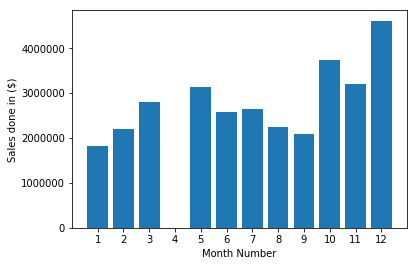

In [17]:
# # np.arange(all_)
# # all_data['Month'].unique()[-1]
# new_month = pd.to_numeric(all_data['Month'])
# # x_value = range( new_month.unique()[0],  new_month.unique()[-1])
# # for i in x_value:
# #     print(i)
# # all_data['Month'].unique()[0:-1]
# new_month = 
# # new_month
# type(new_month)
# minVal = all_data['Month'] = pd.to_numeric()

x_values = range( np.min(pd.to_numeric(all_data['Month'])), np.max(pd.to_numeric(all_data['Month']) + 1 ))
 # this + 1 here because range is [ range(min, max+1) ] so the max+1 value is excluded

plt.bar(x_values, sales_sum['Sales'])
plt.xticks(x_values)
plt.xlabel('Month Number')
plt.ylabel('Sales done in ($)')
plt.show()

### Ans) December (12) is the best month for sale according to the analysis.

# Q2) What is the best City According to Sales

## Making a new City Column :

In [86]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' - ' + x.split(',')[2].split(' ')[1] ) # <-- City_name State
# all_data['City']

city_value = all_data.groupby('City').sum()
city_value

# city_array = all_data['City'].unique()

,Quantity Ordered,Price Each,Sales,Hours
City,,,,
Atlanta - GA,14969,2.497028e+06,2.511044e+06,193140
Austin - TX,10061,1.638386e+06,1.646898e+06,128194
Boston - MA,20338,3.285667e+06,3.307762e+06,260628
Dallas - TX,15211,2.500939e+06,2.515135e+06,195147
Los Angeles - CA,29890,4.873444e+06,4.901172e+06,384372
New York City - NY,25191,4.192978e+06,4.217730e+06,322435
Portland - ME,2485,4.048190e+05,4.072218e+05,31695
Portland - OR,10169,1.662836e+06,1.672141e+06,130246
San Francisco - CA,45252,7.401123e+06,7.445129e+06,579657


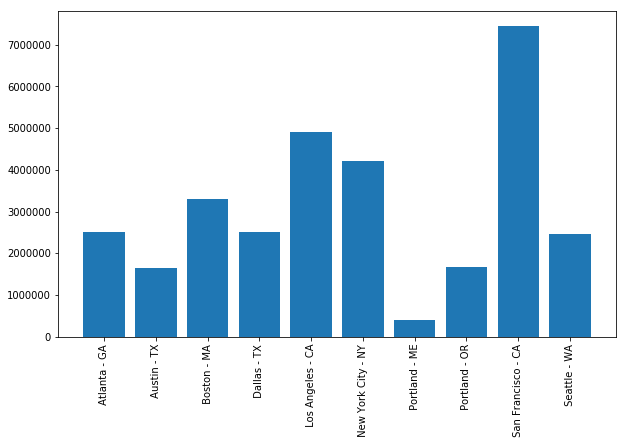

In [83]:

city_array = [city for city, df in all_data.groupby('City')]
# city_array

plt.bar( city_array, city_value['Sales'], align='center' )
plt.xticks(city_array, rotation='vertical')
plt.show()

In [19]:
print(city_value), print(city_array)

                   Quantity Ordered    Price Each         Sales
City                                                           
 Atlanta GA                   14969  2.497028e+06  2.511044e+06
 Austin TX                    10061  1.638386e+06  1.646898e+06
 Boston MA                    20338  3.285667e+06  3.307762e+06
 Dallas TX                    15211  2.500939e+06  2.515135e+06
 Los Angeles CA               29890  4.873444e+06  4.901172e+06
 New York City NY             25191  4.192978e+06  4.217730e+06
 Portland ME                   2485  4.048190e+05  4.072218e+05
 Portland OR                  10169  1.662836e+06  1.672141e+06
 San Francisco CA             45252  7.401123e+06  7.445129e+06
 Seattle WA                   14945  2.458851e+06  2.471745e+06
[' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX', ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR', ' San Francisco CA', ' Seattle WA']


(None, None)

## Ans) San Francisco-CA is the best saling city

### Question-3) What time should we display advertisement to maximize likelyhood of customer's buying product?

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08,23.98,Seattle WA
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08,99.99,Dallas TX
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",08,700.00,Portland OR
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08,7.68,Los Angeles CA
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08,7.68,New York City NY


In [30]:
all_data['Order Date'] = pd.to_datetime( all_data['Order Date'] )
all_data['Hours'] = all_data['Order Date'].dt.hour
# all_data.head()
all_data.groupby('Hours').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hours,,,,,,,,,
0,3532,3532,3532,3532,3532,3532,3532,3532,3532
1,2106,2106,2106,2106,2106,2106,2106,2106,2106
2,1111,1111,1111,1111,1111,1111,1111,1111,1111
3,746,746,746,746,746,746,746,746,746
4,770,770,770,770,770,770,770,770,770
5,1178,1178,1178,1178,1178,1178,1178,1178,1178
6,2228,2228,2228,2228,2228,2228,2228,2228,2228
7,3627,3627,3627,3627,3627,3627,3627,3627,3627
8,5613,5613,5613,5613,5613,5613,5613,5613,5613


In [55]:
sales_per_hour = all_data.groupby('Hours').sum()
sales_per_hour

,Quantity Ordered,Price Each,Sales
Hours,,,
0,3986,635265.18,639392.11
1,2343,410798.99,412855.83
2,1253,211519.89,212467.24
3,835,125222.44,126205.67
4,844,143499.39,144032.54
5,1328,209208.79,210165.27
6,2510,404191.84,406546.07
7,4137,671345.32,675012.01
8,6279,1071763.24,1077591.42


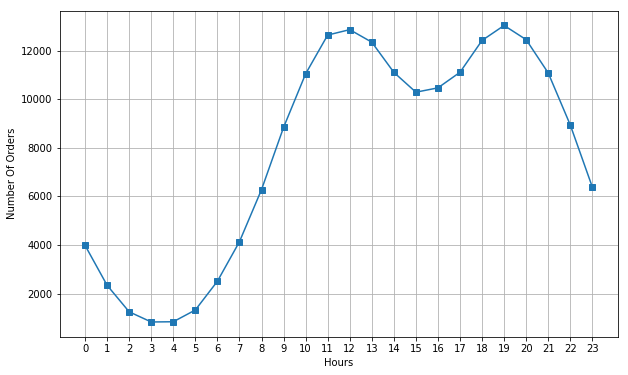

In [80]:
hours = [hour for hour, df in all_data.groupby('Hours') ]
# plt.plot( hours, all_data.groupby('Hours').count() )
plt.plot( hours, sales_per_hour['Quantity Ordered'], marker = 's' )
plt.xticks( list(range(hours[0], hours[-1] + 1 )))
plt.rcParams['figure.figsize'] = 10,6
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.show()

### Ans) So the best range in which most of orders are placed are from Hour 11 - 19

## Question 4: What products are most often sold together.  

In [100]:
# all_data.groupby('Order ID')['Product'].count()
group_df = all_data[all_data['Order ID'].duplicated(keep=False)]
group_df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
46,236716,AA Batteries (4-pack),2,3.84,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",08,7.68,San Francisco - CA,20
47,236716,USB-C Charging Cable,1,11.95,2019-08-17 20:12:00,"84 Cedar St, San Francisco, CA 94016",08,11.95,San Francisco - CA,20
60,236729,iPhone,1,700.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",08,700.00,San Francisco - CA,9
61,236729,Apple Airpods Headphones,1,150.00,2019-08-09 09:28:00,"635 Lake St, San Francisco, CA 94016",08,150.00,San Francisco - CA,9
62,236730,Google Phone,1,600.00,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",08,600.00,New York City - NY,10
63,236730,Wired Headphones,1,11.99,2019-08-02 10:17:00,"445 Lincoln St, New York City, NY 10001",08,11.99,New York City - NY,10
132,236799,Google Phone,1,600.00,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",08,600.00,San Francisco - CA,12
133,236799,Wired Headphones,1,11.99,2019-08-01 12:38:00,"309 2nd St, San Francisco, CA 94016",08,11.99,San Francisco - CA,12
163,236829,Vareebadd Phone,1,400.00,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",08,400.00,Los Angeles - CA,8
164,236829,USB-C Charging Cable,1,11.95,2019-08-16 08:51:00,"27 2nd St, Los Angeles, CA 90001",08,11.95,Los Angeles - CA,8


In [103]:
group_df.groupby('Order ID')['Product'].count()

Order ID
141275    2
141290    2
141365    2
141384    2
141450    2
141457    2
141478    2
141550    3
141587    2
141645    2
141738    2
141782    2
141789    2
141795    2
141809    2
141843    2
141900    3
141901    2
141910    2
141939    2
141946    2
141947    2
141965    2
141967    2
141970    2
141972    2
141993    2
142010    2
142023    2
142037    2
         ..
318790    2
318794    2
318854    2
318872    2
318902    2
318919    2
318964    2
318965    2
319032    2
319045    2
319095    2
319239    2
319261    2
319266    2
319276    2
319277    2
319282    2
319301    2
319313    2
319316    2
319337    2
319359    2
319447    2
319514    2
319533    2
319536    2
319556    2
319584    2
319596    2
319631    2
Name: Product, Length: 6419, dtype: int64

In [23]:
# all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data['Month'] = 3
# all_data['Month'].head()
# df_april = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
# '0'+all_data[all_data['Order Date'] == '4/19/2019']
# df_april['Order Date'] = df_april['Order Date'].str
# df_april['Order Date']
# dateString = '04/19/2019 8:46'
# print(re.findall(r'[0-9]?/', dateString))
# pattern = re.compile(r'^[0-9]+')
# matches = pattern.finditer(dateString)
# for match in matches:
#     print(match)
    
# df_april['new'] = df_april['Order Date'].str[0:1]
# df_april['new'] = '0' + df_april['new']
# df_april['new']
# value, value1 = df_april['Order Date'].str.split(r'^[0-9]+/')
# value[0]
# df_april['Order Date'] = pd.to_datetime(df_april['Order Date'])

In [24]:
# df_april['Order Date'] = pd.to_datetime(df_april['Order Date'])